## Info

- 3가지 데이터 (미세먼지, 위치, 날씨) 추출
    - 날씨 데이터는 위치값이 안맞아서 평균하였음.
- 3가지 데이터 취합

In [1]:
# swagger : http://dev.jinwoosi.co.kr:8083/swagger-ui/index.html
# rest api :  http://dev.jinwoosi.co.kr:8083/v1/{데이터명}
# ex ) http://dev.jinwoosi.co.kr:8083/v1/air-quality?start_time=2023-06-09%2010:00:00&end_time=2023-06-09%2010:00:00

In [2]:
# http://dev.jinwoosi.co.kr:8083/v1/air-quality?start_date_time=2023-08-29%2000%3A00%3A00&end_date_time=2023-08-30%2000%3A00%3A00&page_number=1&number_of_rows=10&lang=ko

- start_date_time: 조회 시작일/시각
- end_date_time: 조회 종료일/시각
- page_number: 페이지 번호
- number_of_rows: 페이지 별 조회 개수

In [1]:
import urllib.parse # Python의 표준 라이브러리인 urllib 모듈의 하위 모듈로, URL을 다루기 위한 다양한 함수와 클래스를 제공
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from src.utils.util import *
import matplotlib.pyplot as plt
import copy

In [2]:
# URL 디코딩
encoded_time = "%2000%3A00%3A00"
decoded_time = urllib.parse.unquote(encoded_time)
print(f"디코딩 전 : {encoded_time}")
print(f"디코딩 후 : {decoded_time}")

# URL 인코딩 테스트
time_str = "2012:00:30" # 인코딩할 시간 값
encoded_time = urllib.parse.quote(time_str) # URL 인코딩
print(f"인코딩 전 : {time_str}")
print(f"인코딩 후 : {encoded_time}")

디코딩 전 : %2000%3A00%3A00
디코딩 후 :  00:00:00
인코딩 전 : 2012:00:30
인코딩 후 : 2012%3A00%3A30


## 데이터로드
- 2023년 05월 12일자부터 데이터 존재

#### 1. 대기 오염 정보

데이터 로드 테스트

In [3]:
TARGET = "air-quality"
START_TIME = "2023-06-01" + "%2001%3A00%3A00"
END_TIME = copy.deepcopy(START_TIME)
OUTPUT_FILE = 'test_data.json'
data = fetch_data_from_url(TARGET, 
                           START_TIME,
                           END_TIME,
                           OUTPUT_FILE)

HTTP 요청 성공


데이터 로드 및 데이터프레임 생성

In [82]:
TARGET = "air-quality"
START_TIME = "2023-08-24"
END_TIME = "2023-08-27"
# END_TIME = datetime.now().strftime("%Y-%m-%d")
DATA_RANGE = get_dates(START_TIME, END_TIME)
observed_lst = fetch_data_from_url_for_timedelta(TARGET,DATA_RANGE)
df = pd.DataFrame(observed_lst)
df.to_csv("data/air_quality_data.csv",index=False)

100%|██████████| 4/4 [00:09<00:00,  2.29s/it]


In [15]:
# 결측치 확인
null_count = df.isna().sum()
print(null_count)

date_time                0
measure_position_id      0
so2_value               99
co_value                99
o3_value                99
no2_value               99
pm10_value              33
pm10_expected_value     54
pm25_value              47
pm25_expected_value     64
integrated_value       127
integrated_grade       127
so2_grade               99
co_grade                99
o3_grade                99
no2_grade               99
pm10_day_grade          54
pm25_day_grade          47
pm10_hour_grade         33
so2_flag               765
co_flag                765
o3_flag                765
no2_flag               765
pm10_flag              831
pm25_flag              817
dtype: int64


시각화 확인

In [16]:
df = pd.read_csv("data/air_quality_data.csv")

1번 Position의 PM10 결측치 수 : 3
2번 Position의 PM10 결측치 수 : 0
3번 Position의 PM10 결측치 수 : 22
4번 Position의 PM10 결측치 수 : 0
5번 Position의 PM10 결측치 수 : 0
6번 Position의 PM10 결측치 수 : 0
7번 Position의 PM10 결측치 수 : 0
8번 Position의 PM10 결측치 수 : 0
9번 Position의 PM10 결측치 수 : 0
10번 Position의 PM10 결측치 수 : 0
11번 Position의 PM10 결측치 수 : 0
12번 Position의 PM10 결측치 수 : 8


'\nplt.figure(figsize=[24,16])\nfor test_pos in range(1,13):\n    test_df = df[df["measure_position_id"]==test_pos]\n    pm25 = test_df["pm25_value"].values\n    null_count = test_df["pm25_value"].isna().sum()\n    print(f"{test_pos}번 Position의 PM25 결측치 수 : {null_count}")\n    time = np.arange(len(test_df["date_time"].values))\n    \n    plt.subplot(4,3,test_pos)\n    plt.subplots_adjust(wspace=0.2, hspace=0.5)\n    plt.plot(time,pm25)\n    plt.title(f"position {test_pos}")\n    plt.xlabel("time")\n    plt.ylabel(\'pm25 value\')\n'

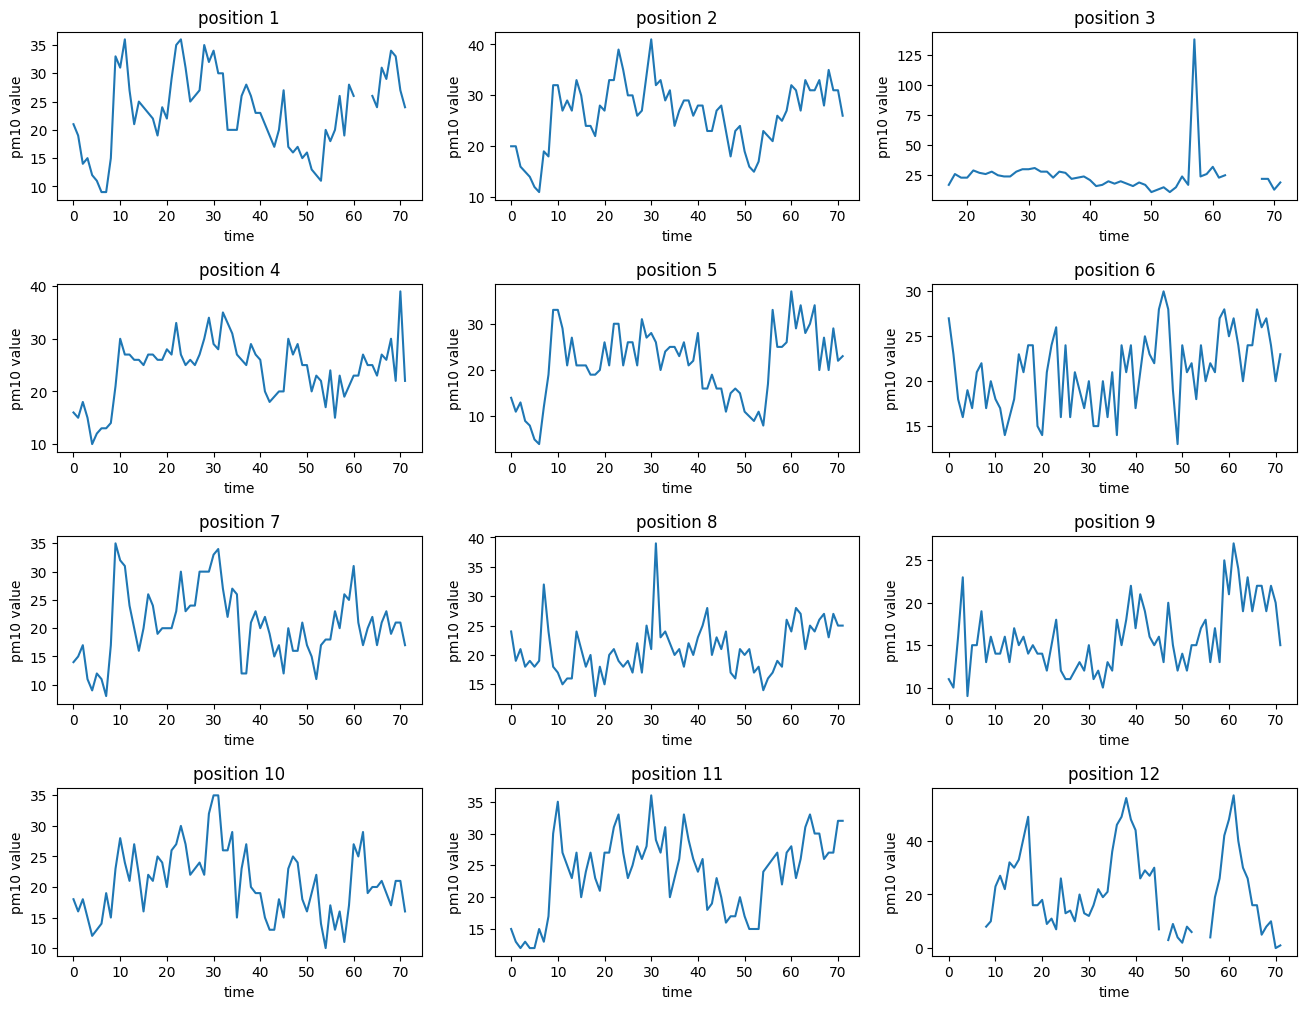

In [17]:
# 위치 1~12 테스트 (pm 10)
plt.figure(figsize=[16,12])
for test_pos in range(1,13):
    test_df = df[df["measure_position_id"]==test_pos]
    pm10 = test_df["pm10_value"].values
    null_count = test_df["pm10_value"].isna().sum()
    print(f"{test_pos}번 Position의 PM10 결측치 수 : {null_count}")
    time = np.arange(len(test_df["date_time"].values))
    
    plt.subplot(4,3,test_pos)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.plot(time,pm10)
    plt.title(f"position {test_pos}")
    plt.xlabel("time")
    plt.ylabel('pm10 value')

# 위치 1~12 테스트 (pm 25)
"""
plt.figure(figsize=[24,16])
for test_pos in range(1,13):
    test_df = df[df["measure_position_id"]==test_pos]
    pm25 = test_df["pm25_value"].values
    null_count = test_df["pm25_value"].isna().sum()
    print(f"{test_pos}번 Position의 PM25 결측치 수 : {null_count}")
    time = np.arange(len(test_df["date_time"].values))
    
    plt.subplot(4,3,test_pos)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.plot(time,pm25)
    plt.title(f"position {test_pos}")
    plt.xlabel("time")
    plt.ylabel('pm25 value')
"""

#### 2. 측정 위치 정보

데이터 로드 및 데이터프레임 생성
- 위치는 어차피 변하지 않을거같으니까, 고정해도 될 것 같음.

In [100]:
TARGET = "measure-position"
START_TIME = "2023-08-25"
END_TIME = copy.deepcopy(START_TIME)
DATA_RANGE = get_dates(START_TIME, END_TIME)
observed_lst = fetch_data_from_url_for_timedelta(TARGET,DATA_RANGE)

100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


In [101]:
# 저장
df_position = pd.DataFrame(observed_lst)        
df_position.to_csv("data/position_data.csv",index=False)    

위치 목록 :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 142, 143, 144, 145, 146, 147, 148, 149]


Text(0.5, 1.0, 'Point Plot')

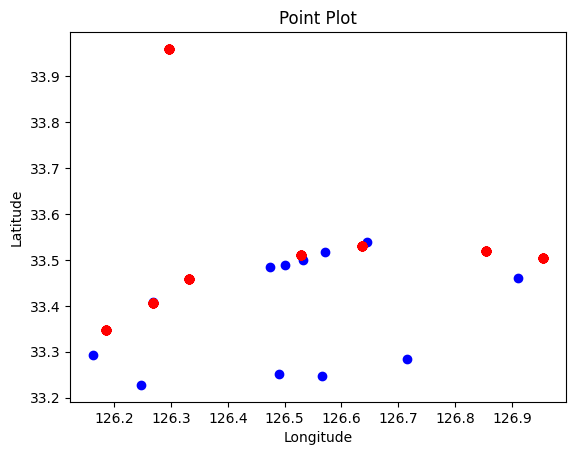

In [3]:
# 위치데이터 확인
df_position = pd.read_csv("data/position_data.csv")
print("위치 목록 : ", list(set(df_position['id'].values)))
df_1_12 = df_position[(df_position['id']>=1) & (df_position['id']<=12)].iloc[:12,:]
df_other = df_position[(df_position['id']>12)]
plt.scatter(df_1_12['longitude'], df_1_12['latitude'], c='b', marker='o')
plt.scatter(df_other['longitude'], df_other['latitude'], c='r', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Point Plot')

실제 거리값 확인 (데이터가 맞는지)

In [4]:
from haversine import haversine # 지구에서 두 지점사이에 거리를 계산함.

position = df_position[(df_position['id']>=1) & (df_position['id']<=12)].iloc[:12,:] # 위치값 1~12만 사용
position.rename(columns={"id":"measure_position_id"},inplace=True) # 컬럼명 변경

# 위치 최대/최소 값 지정 (스케일링에 사용)
lat_min,lat_max = np.min(position["latitude"].values),np.max(position["latitude"].values) # latitude = 위도 = y
lot_min,lot_max = np.min(position["longitude"].values),np.max(position["longitude"].values) # longitude = 경도 = x
print(f"위도(Y) 최소 : {lat_min}")
print(f"위도(Y) 최대 : {lat_max}")
print(f"경도(X) 최소 : {lot_min}")
print(f"경도(X) 최대 : {lot_max}")

# 거리 차이 확인
# 세로 : 34.70199414894928 --> 40개로 나눔
# 가로 : 69.56591832432922 --> 80개로 나눔
pos_1 = (lat_max, lot_min) # (lat, lon)
pos_2 = (lat_max, lot_max)
x_diff = haversine((lat_max, lot_min), (lat_max, lot_max))
y_diff = haversine((lat_min, lot_max), (lat_max, lot_max))
print(f"경도 거리 차이 : {x_diff} km")
print(f"위도 거리 차이 : {y_diff} km")

위도(Y) 최소 : 33.2277489
위도(Y) 최대 : 33.539831
경도(X) 최소 : 126.162165
경도(X) 최대 : 126.91007
경도 거리 차이 : 69.31666739012775 km
위도 거리 차이 : 34.70199414894928 km


#### 3. 환경 (풍속, 풍향 등) 정보확인
- 환경(풍속,풍향 등) 데이터는 8월 24일 06:00 부터 있음

In [53]:
TARGET = "weather-vilage-fcst"
START_TIME = "2023-09-01" + "%2001%3A00%3A00"
END_TIME = copy.deepcopy(START_TIME)
OUTPUT_FILE = 'test_data.json'
data = fetch_data_from_url(TARGET, 
                           START_TIME,
                           END_TIME,
                           OUTPUT_FILE)

HTTP 요청 성공


In [67]:
TARGET = "weather-vilage-fcst"
START_TIME = "2023-08-24"
END_TIME = "2023-08-27"
# END_TIME = datetime.now().strftime("%Y-%m-%d")
DATA_RANGE = get_dates(START_TIME, END_TIME)
observed_lst = fetch_data_from_url_for_timedelta(TARGET,DATA_RANGE)

100%|██████████| 4/4 [00:09<00:00,  2.30s/it]


In [68]:
# 저장
df_weather = pd.DataFrame(observed_lst)        
df_weather.to_csv("data/weather.csv",index=False)    

#### 4. 결합

In [73]:
df_airquality = pd.read_csv("data/air_quality_data.csv")
airquality = df_airquality[["date_time","measure_position_id","pm10_value","pm25_value"]]

In [77]:
df_position = pd.read_csv("data/position_data.csv")
position = df_position[(df_position['id']>=1) & (df_position['id']<=12)].iloc[:12,:]
position.rename(columns={"id":"measure_position_id"},inplace=True) # 컬럼 이름변경

In [97]:
df_weather = pd.read_csv("data/weather.csv")
le = LabelEncoder()
df_weather['precipitation_one_hour'] = le.fit_transform(df_weather['precipitation_one_hour'])
# weather = df_weather[["date_time","measure_position_id","precipitation_one_hour","humidity","temperature","wind_speed",]]
weather = df_weather.drop(["precipitation_percent","snow_cover_one_hour",
                           "highest_temperature","lowest_temperature"],axis=1)
weather = weather.groupby('date_time').mean() # date_time 컬럼 기준으로 나머지 컬럼에 있는 값들 평균내기
weather.drop("measure_position_id",axis=1,inplace=True)

In [98]:
merged_df = pd.merge(airquality, position, on='measure_position_id', how='left')
merged_df = pd.merge(merged_df, weather, on='date_time', how='left')
merged_df['measure_position_id'] = merged_df['measure_position_id'].astype("float64")
merged_df.drop("grid_x",axis=1,inplace=True)
merged_df.drop("grid_y",axis=1,inplace=True)

In [99]:
merged_df.to_csv("data/merged_df.csv",index=False)